In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_local = "../../FBD_local_data/"
data_repo = "../Data/"

### Notebook to work on pairs trading strategy

This notebook starts with importing the clustering table.  
Is a table with index:assets (tickers), one column:cluster (int)

In [254]:
industry_mappings = pd.read_csv(data_local + "industry_mapping.csv" )
industries = industry_mappings["industry"].unique()
print(len(industries))

10


In [255]:
# Retrive tickers
df = pd.read_csv(data_local + "stock_prices.csv")
TICKERS = list(df.columns[1:])

tickers_index_map = {v: i for i, v in enumerate(TICKERS)}

,asset,cluster
0,ABT,7
1,AEP,4
2,ALL,8
3,APA,5
4,AVP,7
...,...,...
79,WMB,9
80,WMT,7
81,WY,9
82,XOM,8


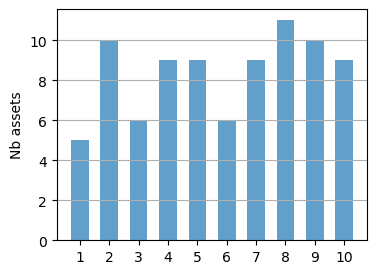

In [256]:


# Generate random clustering table (later, work with tables of part3)
np.random.seed(42)
def generate_random_clusters(n_clusters=3):
    df_clusters = pd.DataFrame(columns=["asset", "cluster"])
    
    df_clusters["asset"] = TICKERS
    df_clusters["cluster"] = np.random.randint(1, n_clusters+1, size=len(TICKERS))
    
    return df_clusters
    



n_clusters = 10
df_clusters = generate_random_clusters(n_clusters)

display(df_clusters)

plt.figure(figsize=(4, 3))
plt.bar(df_clusters["cluster"].value_counts().index, df_clusters["cluster"].value_counts().values, width=0.6, alpha=0.7)
plt.xticks(range(n_clusters+1)[1:])
plt.ylabel("Cluster")
plt.ylabel("Nb assets")
plt.grid(axis="y")
plt.show()


In [257]:
display(df_clusters)

,asset,cluster
0,ABT,7
1,AEP,4
2,ALL,8
3,APA,5
4,AVP,7
...,...,...
79,WMB,9
80,WMT,7
81,WY,9
82,XOM,8


In [258]:
# Import prices and compute returns

df_prices = pd.read_csv(data_local + "stock_prices.csv")
df_prices.set_index("timestamp", inplace=True, drop=True)
df_prices = df_prices.interpolate(method="linear", limit_direction="both")

df_returns = df_prices.pct_change()

DATA = {}
DATA["PRICES"] = df_prices
DATA["RETURNS"] = df_returns
display(DATA["RETURNS"])

,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,UTX,V,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-02 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-02 13:31:00,0.001086,0.000000,0.001845,0.000000,0.000000,0.000000,0.000000,0.000256,-0.000613,0.000000,...,0.002204,0.002427,0.000645,0.000311,0.001472,0.000000,0.002191,-0.001661,-0.000118,0.000000
2008-09-02 13:32:00,0.000139,-0.001650,-0.000629,0.000000,0.002826,0.004663,-0.000466,-0.000373,0.003050,0.000171,...,0.001687,-0.000645,-0.000271,0.002273,0.000370,-0.003892,0.004793,-0.001168,-0.002759,0.000000
2008-09-02 13:33:00,-0.000096,-0.000725,-0.006185,0.000000,-0.001030,-0.003144,0.003865,-0.001452,0.002064,-0.001605,...,0.001327,-0.000165,0.000396,-0.000499,-0.002253,-0.009882,0.003259,0.000344,-0.001861,0.003866
2008-09-02 13:34:00,0.000238,0.002116,-0.003240,-0.004954,0.000277,-0.006141,-0.003122,-0.004618,0.000466,0.002890,...,0.001533,0.001093,0.001267,0.000467,-0.000040,-0.004534,0.002060,0.002944,0.001328,0.000495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-30 21:34:00,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000021,0.000000,...,-0.000004,0.000000,0.000000,0.000000,0.000025,-0.000050,0.000000,0.000000,0.000000,0.000000
2008-12-30 21:37:00,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000021,0.000000,...,-0.000004,0.000000,0.000000,0.000000,0.000025,-0.000050,0.000000,0.000000,0.000000,0.000000
2008-12-30 21:38:00,-0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000021,0.000000,...,-0.000004,0.000000,0.000000,0.000000,0.000000,-0.000050,0.000000,0.000000,0.000000,0.000000


In [259]:
start_date = "2008-09-02"
end_date = "2008-09-31"
df_prices_window = df_prices[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
df_returns_window = df_returns[(df_returns.index >= start_date) & (df_returns.index <= end_date)]
df_cum_returns_window = (1 + df_returns_window).cumprod() - 1


In [260]:
display(df_returns_window)

,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,UTX,V,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-02 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-02 13:31:00,0.001086,0.000000,0.001845,0.000000,0.000000,0.000000,0.000000,0.000256,-0.000613,0.000000,...,2.204219e-03,0.002427,0.000645,0.000311,0.001472,0.000000,0.002191,-0.001661,-0.000118,0.000000
2008-09-02 13:32:00,0.000139,-0.001650,-0.000629,0.000000,0.002826,0.004663,-0.000466,-0.000373,0.003050,0.000171,...,1.687033e-03,-0.000645,-0.000271,0.002273,0.000370,-0.003892,0.004793,-0.001168,-0.002759,0.000000
2008-09-02 13:33:00,-0.000096,-0.000725,-0.006185,0.000000,-0.001030,-0.003144,0.003865,-0.001452,0.002064,-0.001605,...,1.326983e-03,-0.000165,0.000396,-0.000499,-0.002253,-0.009882,0.003259,0.000344,-0.001861,0.003866
2008-09-02 13:34:00,0.000238,0.002116,-0.003240,-0.004954,0.000277,-0.006141,-0.003122,-0.004618,0.000466,0.002890,...,1.532549e-03,0.001093,0.001267,0.000467,-0.000040,-0.004534,0.002060,0.002944,0.001328,0.000495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30 20:30:00,-0.000476,-0.000638,-0.000098,-0.001950,-0.000229,-0.000730,0.000504,-0.000735,0.000421,0.000000,...,4.899943e-06,-0.000151,-0.000511,-0.001549,0.000000,-0.001740,0.000000,-0.001152,-0.000407,0.000000
2008-09-30 20:32:00,-0.000476,-0.000638,-0.000098,-0.001954,-0.000229,-0.000730,0.000503,-0.000735,0.000421,0.000000,...,2.220446e-16,-0.000151,-0.000512,-0.001551,0.000000,-0.001743,0.000000,-0.001153,-0.000407,-0.001764
2008-09-30 20:35:00,-0.000476,-0.000638,-0.011242,-0.001958,-0.000229,-0.000731,0.000503,-0.000736,0.000421,-0.003210,...,-2.879886e-03,-0.000151,-0.000512,-0.001554,0.000000,-0.001746,0.000000,-0.001154,-0.000407,-0.001767


In [261]:
np_positions = np.zeros((len(df_returns_window.index), len(TICKERS)+1))



print(np_positions.shape)

(8574, 85)


In [262]:
window = 10
lambda_in = 2
lambda_out = 0.5
lambda_emergency = 3
patience_max = 30

In [267]:
import matplotlib.dates as mdates

class Pair:
    def __init__(self, stock_A, stock_B):
        self.stock_A = stock_A 
        self.index_A = tickers_index_map[stock_A]
        self.stock_B = stock_B
        self.index_B = tickers_index_map[stock_B]
        self.entered = False # True only when pair is entered
        self.invert = None # baseline: longA shortB, invert: shortA longB
        self.current_t_in = None
        self.windows = []
        self.R_in = None
        self.cumulR_in = None
        self.patience = 0

    def enter(self, invert, t_in, R_in, cumulR_in):
        self.entered = True
        self.invert = invert
        self.current_t_in = t_in
        self.R_in = R_in
        self.cumulR_in = cumulR_in

    def exit(self, t_out, emergency):
        self.entered = False
        self.windows.append([self.current_t_in, t_out, self.invert, emergency])
        self.invert = None
        self.current_t_in = None
        self.R_in = None
        self.patience = 0

    def evaluate(self, t):
        
        returns_diff_window = df_returns_window[self.stock_A].iloc[t - window: t+1] - df_returns_window[self.stock_B].iloc[t - window: t+1]
        rolling_sigma = returns_diff_window.std()
        latest_return_diff = df_returns_window[self.stock_A].iloc[t] - df_returns_window[self.stock_B].iloc[t]

        cumul_returns_diff = (1 + returns_diff_window).cumprod() - 1

        if(not self.entered):
            
            # Check for SIGNAL D'ENTREE

            if latest_return_diff > lambda_in * rolling_sigma:  # Enter pair, short A long B
                self.enter(invert = True,
                           t_in = t,
                           R_in = latest_return_diff,
                           cumulR_in = cumul_returns_diff.iloc[-1])

            elif latest_return_diff < - lambda_in * rolling_sigma:  # Enter pair, long A short B
                self.enter(invert = False,
                           t_in = t,
                           R_in = latest_return_diff, 
                           cumulR_in = cumul_returns_diff.iloc[-1])

        else:
            # Check for SIGNAL DE SORTIE
        
            if self.invert == True:
                # Sortie bénéfique
                if cumul_returns_diff.iloc[-1] < lambda_out * self.cumulR_in:
                    self.exit(t_out = t, emergency = 'No')
                    return
                # Sortie d'urgence
                elif cumul_returns_diff.iloc[-1] > lambda_emergency * self.cumulR_in:
                    self.exit(t_out = t, emergency = 'onDrift')
                    return


            else:
                # Sortie bénéfique
                if cumul_returns_diff.iloc[-1] > lambda_out * self.cumulR_in:
                    self.exit(t_out = t, emergency = 'No')
                    return
                # Sortie d'urgence
                elif cumul_returns_diff.iloc[-1] < lambda_emergency * self.cumulR_in:
                    self.exit(t_out = t, emergency = 'onDrift')
                    return
            
            # Sortie sur patience
            if self.patience < patience_max:
                self.patience += 1
            else:
                self.exit(t_out = t, emergency = 'onPatience')

        # update positions dataframe
        if(self.entered):
            np_positions[t, self.index_A] += (1 if not self.invert else -1) * -1
            np_positions[t, self.index_B] += (-1 if not self.invert else 1) * -1
            

    def info(self):
        print("PAIR==================")
        print("Stocks: " + self.stock_A + ", " + self.stock_B)
    

    def plot_lifetime_last(self):
        fig, ax = plt.subplots(figsize = (22, 4))
        ax.set_title("Lifetime of pair (" + self.stock_A + ", "  + self.stock_B + ")", fontsize = 14) 
        ax.plot(df_cum_returns_window[self.stock_A], color = "purple", label = "(A) " + self.stock_A)
        ax.plot(df_cum_returns_window[self.stock_B], color = "darkgreen", label = "(B) " + self.stock_B)
        ax.set_xticks([])
        #plt.plot(df_returns[self.stock_A] - df_returns[self.stock_B], label = "A - B")
        ax.grid(alpha = 0.5)
        
        
        if len(self.windows) > 0:
            for i in range(len(self.windows)):
        
                t_in, t_out, invert, emergency = self.windows[i]
        
                date_in = df_returns.iloc[t_in].name
                date_out = df_returns.iloc[t_out].name
                ax.axvline(date_out,                 color = 'black' if emergency == 'No' else ('magenta' if emergency == 'onDrift' else 'red'), linewidth=0.3)
                ax.axvspan(date_in, date_out,        color = 'blue' if not invert else 'orange', alpha = 0.2)
            if(self.entered):
                ax.axvline(date_in, linestyle = ':', color = 'gray')
        
        ax.legend()
        plt.show()

In [268]:
# Build pairs in clusters

pairs = []
for cluster in range(1, n_clusters+1):
    stocks_in_cluster = list(df_clusters[df_clusters["cluster"] == cluster]["asset"].values)
    for i, ticker1 in enumerate(stocks_in_cluster):
        for ticker2 in stocks_in_cluster[i+1:]:
            pairs.append(Pair(ticker1, ticker2))

#print(pairs)
nb_pairs = len(pairs)
print(f"Number of pairs: {nb_pairs}")

Number of pairs: 329


In [269]:
# nb_eval = nb_pairs # evaluatee all
nb_eval = 40

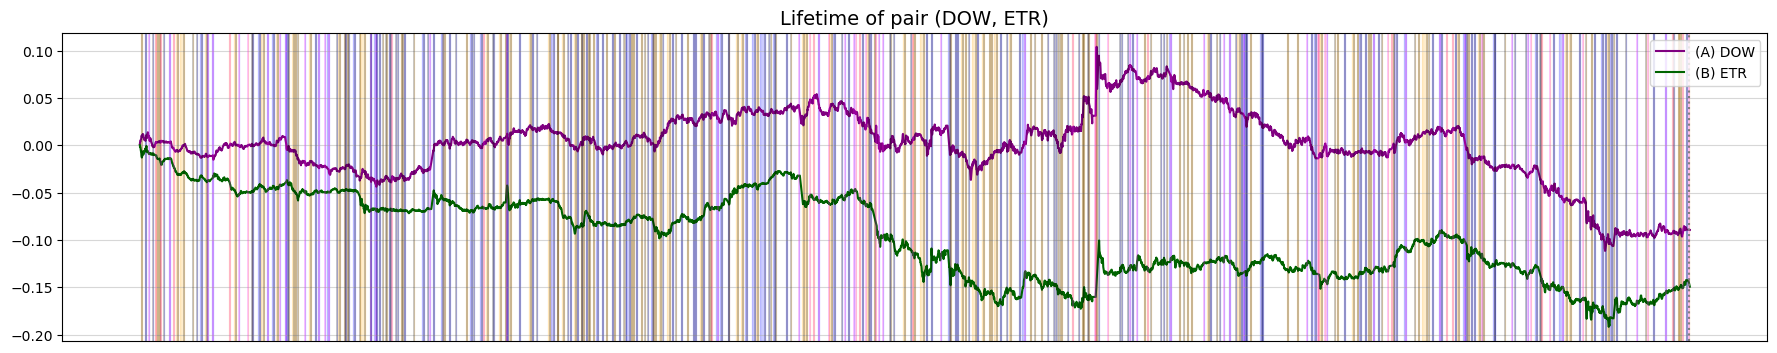

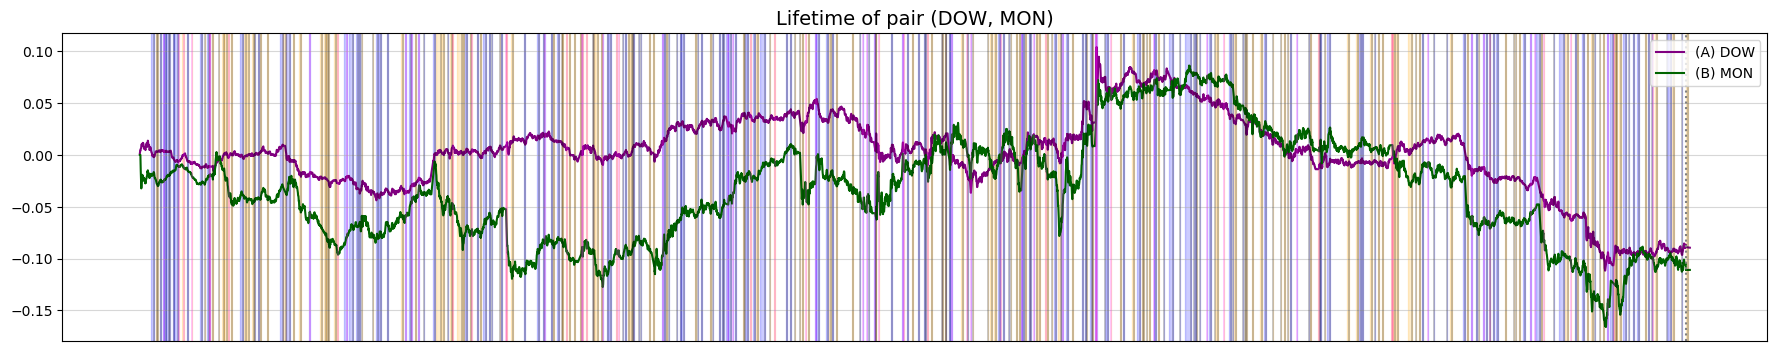

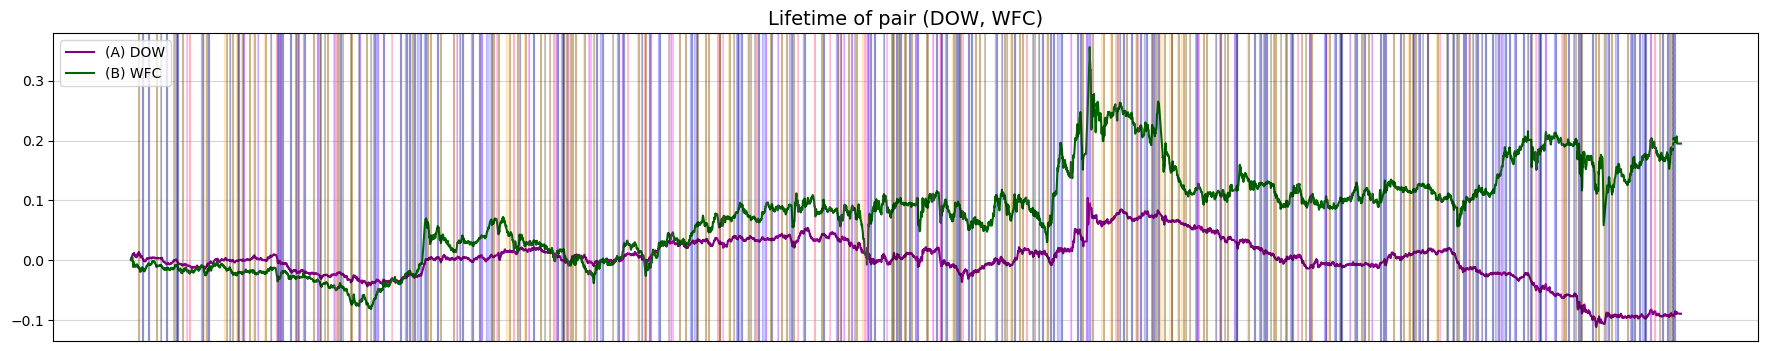

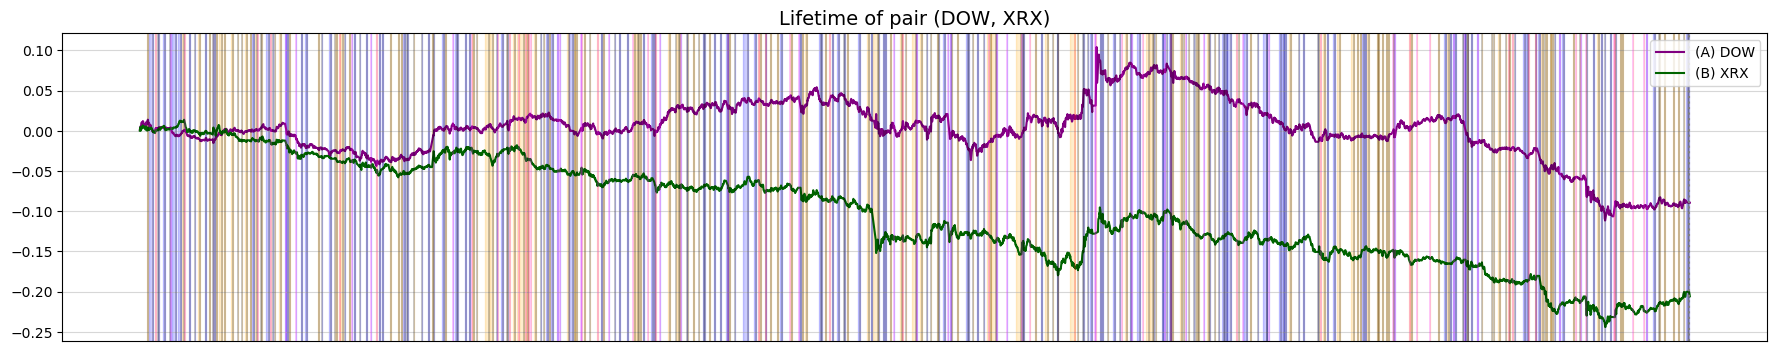

(8574, 85) pair 40/329: KFT-UPS


In [270]:
count = 0
for pair in pairs[:nb_eval]:
    count += 1
    print(f"Evaluating pair {count}/{nb_pairs}: {pair.stock_A}-{pair.stock_B}", end='\r')
    for t in range(window, len(df_returns_window)):
        pair.evaluate(t)
    if(count < 5):
        pair.plot_lifetime_last()

# Do a colulmn for sum of positions to check = 0
np_positions[:, -1] = np_positions.sum(axis=1)
print(np_positions.shape)

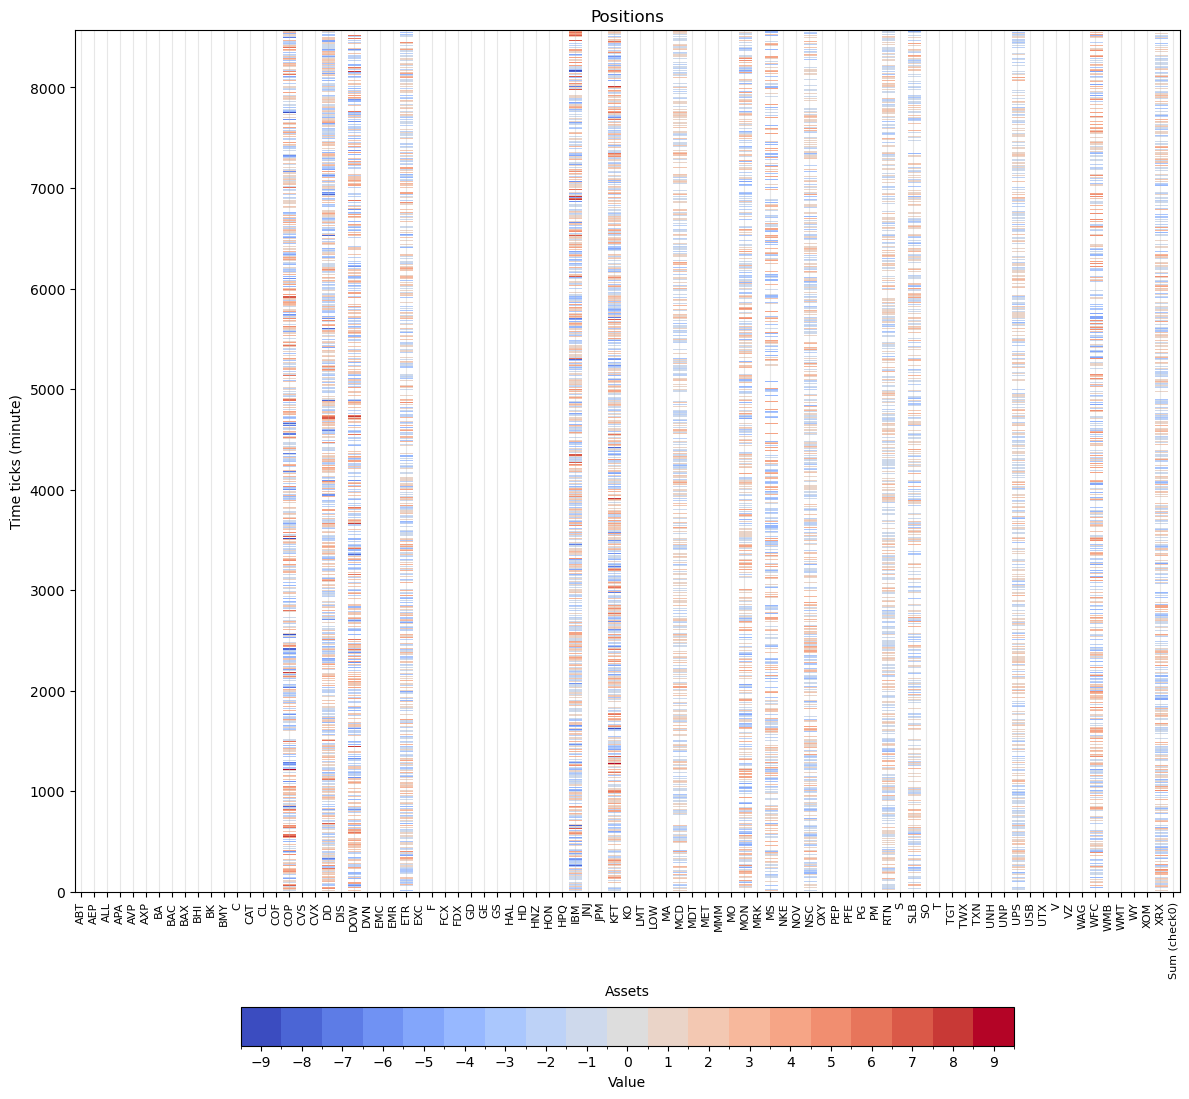

In [271]:
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt
import numpy as np

# Mask zeros so they are transparent
masked = np.ma.masked_equal(np_positions, 0)

vmin = max(masked.min(), -masked.max())
vmax = max(masked.max(), -masked.min())
bounds = np.arange(vmin - 0.5, vmax + 1.5)

cmap = plt.get_cmap("coolwarm", len(bounds) - 1)
norm = BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(
    masked,
    aspect="auto",
    interpolation="nearest",
    cmap=cmap,
    norm=norm,
)

# Horizontal colorbar on top
cbar = fig.colorbar(
    im,
    ax=ax,
    orientation='horizontal',
    shrink=0.7,
    label="Value",
    ticks=np.arange(vmin, vmax + 1),
    pad=0.1  # space between plot and colorbar
)

ax.set_xlabel("Assets")
ax.set_ylabel("Time ticks (minute)")
ax.set_title("Positions")

ax.set_xticks(range(np_positions.shape[1]))
ax.set_xticklabels(TICKERS + ["Sum (check0)"], rotation=90, fontsize=8)

ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [272]:
df_positions = pd.DataFrame(data=np_positions[:,:-1],
                            columns=TICKERS,
                            index=df_returns_window.index)

df_positions

,ABT,AEP,ALL,APA,AVP,AXP,BA,BAC,BAX,BHI,...,UTX,V,VZ,WAG,WFC,WMB,WMT,WY,XOM,XRX
timestamp,,,,,,,,,,,,,,,,,,,,,
2008-09-02 13:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-02 13:31:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-02 13:32:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-02 13:33:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-09-02 13:34:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30 20:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2008-09-30 20:32:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-1.0
2008-09-30 20:35:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,-4.0


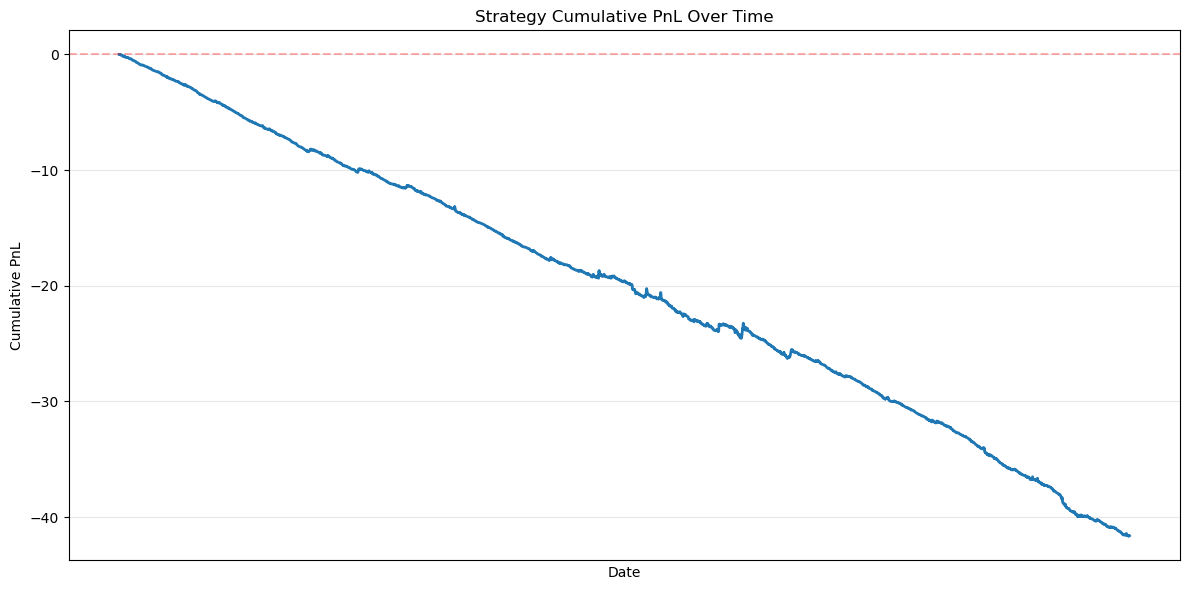

In [282]:


def compute_strategy_pnl(returns_df, positions_df, transaction_cost=0.001):
    
    # Ensure dataframes are aligned
    assert returns_df.shape == positions_df.shape, "Returns and positions must have same shape"
    assert (returns_df.index == positions_df.index).all(), "Indices must match"
    assert (returns_df.columns == positions_df.columns).all(), "Columns must match"
    
    # Position at previous tick (shift forward by 1)
    # We hold the position from t-1 during period t, earning returns[t]
    lagged_positions = positions_df.shift(1).fillna(0)
    
    # Trading PnL: position held * returns earned during that period
    # Each asset contributes: position_held * return_of_asset
    trading_pnl_per_asset = lagged_positions * returns_df
    trading_pnl = trading_pnl_per_asset.sum(axis=1)
    
    # Calculate position changes (where transactions occur)
    position_changes = positions_df.diff().fillna(positions_df.iloc[0])
    
    # Transaction costs: cost * |position_change| for each asset
    # Sum across all assets to get total cost per tick
    transaction_costs_per_tick = (position_changes.abs() * transaction_cost).sum(axis=1)
    
    # Net PnL per tick
    net_pnl_per_tick = trading_pnl - transaction_costs_per_tick
    
    # Return cumulative PnL curve
    cumulative_pnl = net_pnl_per_tick.cumsum()
    
    return cumulative_pnl

pnl_curve = compute_strategy_pnl(df_returns_window, df_positions, transaction_cost=0.001)

plt.figure(figsize=(12, 6))
plt.plot(pnl_curve.index, pnl_curve.values, linewidth=2)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Strategy Cumulative PnL Over Time')
plt.xlabel('Date')
plt.xticks([])
plt.ylabel('Cumulative PnL')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()